### The XOR-Model ###

We will build our tiny neural network predicting the XOR-data in keras

First of all, we need to import the libraries

![](https://miro.medium.com/v2/resize:fit:1358/1*bhFifratH9DjKqMBTeQG5A.gif)

![](https://www.mdpi.com/healthcare/healthcare-08-00181/article_deploy/html/images/healthcare-08-00181-g001.png)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


We need to define simple datas.


In [ ]:
#Input datasets
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])


In [ ]:
x_train.shape
y_train.flatten().shape

y_train.reshape(1, -1).shape


(4, 2)

Now we set up our parameters - and define the model, exactly as in the lecture slides

TODO: Show different way to set up the model, with and without Input layer

In [ ]:
# Set up your model here :

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=2))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation="softmax"))


In [ ]:
"""
model = Sequential()
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation="softmax"))
"""


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])


We already have compiled our model - now we need to train it. We also need to get some predictions in order to see whether our model can indeed predict the XOR-data

In [ ]:
model.fit(x_train, y_train.flatten(), epochs=10)


Epoch 1/10
1/1 [==============================] - 0s 16ms/step - loss: 0.1240 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 0.1170 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 15ms/step - loss: 0.1103 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 0.1040 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0981 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0924 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0869 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0816 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0764 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0713 - accuracy: 1.0000


In [ ]:
# Train your model here, and predict the XOR-data :

model.predict(x_train)


1/1 [==============================] - 0s 122ms/step


array([[0.58630013, 0.4136999 ],
       [0.08469795, 0.9153021 ],
       [0.06663539, 0.9333646 ],
       [0.8265192 , 0.1734808 ]], dtype=float32)

In [ ]:
import pandas as pd
predictionsFinale = []
for ligne in model.predict(x_train):
  if ligne[0] > ligne[1]:
    predictionsFinale.append([0, ligne[0]])
  else:
    predictionsFinale.append([1, ligne[1]])

df = pd.DataFrame(predictionsFinale, columns=["predictions", "probabilités"])
df


1/1 [==============================] - 0s 81ms/step


,predictions,probabilités
0,1,0.502471
1,1,0.508970
2,1,0.543215
3,1,0.508793


What is wrong with these predictions?



In [ ]:
# Please display predicted values :

print("Les prédictions :", df.predictions.values)


Les prédictions : [1 1 1 1]


Let's compare the predictions to the true labels, do you notice a "type" difference ?

In [ ]:
# Please display true values :

print("Les valeurs réelles :", y_train.flatten())


Les valeurs réelles : [0 1 1 0]


This takes ridicuously long! Let's try to get the training faster. But first of all - and in order to "measure" how long the training takes, implement some code which stores the epoch at which the Neural Network has stably reached 100 percent accuracy. Stably means that the accuracy does not jump back to less then 100 percent. There are keras callbacks - and you could write a custom callback. But for now, you can also write a loop - in which the model is trained for one epoch at every iteration. You should store the accuracies at each epoch in a list in order to be able to visualize them.

Do not alter the cost function!

Hint: Good code style would be to put the model set up into a function and also the code to get the accuracy

You should get someting like this format :
* Epoch 0 / 200    accuracy: 0.5
* Epoch 20 / 200    accuracy: 0.5
* Epoch 40 / 200    accuracy: 0.5
* Epoch 60 / 200    accuracy: 0.5



In [ ]:
# function for model-set-up
def build_model(X, y, epochs=200):
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.callbacks import LearningRateScheduler
  import keras

  # Layers
  model = Sequential()
  model.add(Dense(50, activation='relu', input_dim=2))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(50, activation="relu"))
  model.add(Dense(2, activation="softmax"))

  # Création d'une fonction call back qui va être appelé après chaque epoch
  # On crée une liste qui récupérera les valeurs d'accuracy
  accuracys = []
  # La classe callback de keras qui doit hériter de keras.callbacks.Callback
  class CustomCallback(keras.callbacks.Callback):
    # https://keras.io/guides/writing_your_own_callbacks/
    # Le nom on_epoch_end est reconnu par keras, il va lancer la fonction à la fin de chaque epoch
    # La fonction récupère l'accuracy
    def on_epoch_end(self, accuracy, logs=None):
      #keys = list(logs.keys())
      # on ajoute l'accuracy récupéré à la fin de chaque tour dans la liste
      accuracys.append(logs['accuracy'])
      # Si elle est à 100% (1.0)
      if logs['accuracy'] == 1.0:
        # On arrête l'apprentissage
        self.model.stop_training = True
      #print(f"\nAccuracy ! >>> {logs['accuracy']}")
      # Ensuite on retourne la liste des accuracy
      return accuracys

  # Learning rate
  learning_rate = 0.01

  # Optimizer
  opt = keras.optimizers.Adam(learning_rate=learning_rate)

  # Compile

  model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

  model.fit(X, y, epochs=epochs, callbacks=[CustomCallback()])

  return model, accuracys


In [ ]:
model, accuracy = build_model(x_train, y_train.flatten(), epochs=200)


Epoch 1/200
1/1 [==============================] - 0s 467ms/step - loss: 0.7028 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 14ms/step - loss: 0.6894 - accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6798 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6689 - accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6546 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6353 - accuracy: 1.0000


In [ ]:
accuracy


[0.5, 0.5, 0.5, 0.5, 0.5, 1.0]

In [ ]:
model.history.history["accuracy"]


[0.5, 0.5, 0.5, 0.5, 0.5, 1.0]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
import keras
#import tensorflow_addons as tfa


# Layers
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation="softmax"))

# Learning rate
learning_rate = 0.01

# Optimizer
opt = keras.optimizers.Adam(learning_rate=learning_rate)

# Compile

model.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=["accuracy"])

X = x_train
y = y_train.flatten()

def fit_model_and_get_accuracy(model, epochs=60, epoch_log_step=20):
  model.fit(X, y, epochs=epochs, steps_per_epoch=epoch_log_step)
  accuracies_list = model.history.history["accuracy"]
  return accuracies_list

fit_model_and_get_accuracy(model)


Epoch 1/60
20/20 [==============================] - 1s 2ms/step - loss: 0.7004 - accuracy: 0.4000
Epoch 2/60
20/20 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.9500
Epoch 3/60
20/20 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 1.0000
Epoch 4/60
20/20 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 1.0000
Epoch 5/60
20/20 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 6/60
20/20 [==============================] - 0s 2ms/step - loss: 4.9529e-04 - accuracy: 1.0000
Epoch 7/60
20/20 [==============================] - 0s 2ms/step - loss: 2.2600e-04 - accuracy: 1.0000
Epoch 8/60
20/20 [==============================] - 0s 2ms/step - loss: 1.3086e-04 - accuracy: 1.0000
Epoch 9/60
20/20 [==============================] - 0s 2ms/step - loss: 8.9026e-05 - accuracy: 1.0000
Epoch 10/60
20/20 [==============================] - 0s 2ms/step - loss: 6.6397e-05 - accuracy: 1.0000

20/20 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.4000000059604645,
 0.949999988079071,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0]


Le paramètre epoch_log_step dans Keras spécifie la fréquence à laquelle les logs d'entraînement doivent être imprimés. Par défaut, Keras imprime les logs d'entraînement à la fin de chaque époque. Si vous spécifiez une valeur positive pour epoch_log_step, Keras imprimera les logs d'entraînement à la fin de chaque epoch_log_step.

Par exemple, si vous spécifiez epoch_log_step=100, Keras imprimera les logs d'entraînement à la fin de chaque 100 époques.

Vous pouvez utiliser le paramètre epoch_log_step pour suivre l'évolution de l'entraînement de votre modèle sans avoir à attendre la fin de chaque époque. Cela peut être utile pour identifier les problèmes d'entraînement potentiels ou pour suivre les progrès de votre modèle.

## First Simple Reference Model (hidden_shape = 2, hidden_size = 1)

In [ ]:
# Use your functions to execute your script

# function for model-set-up
def build_model(X, y, epochs=200):
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.callbacks import LearningRateScheduler
  import keras

  # Layers
  model = Sequential()
  model.add(Dense(50, activation='relu', input_dim=2))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(21, activation="relu"))
  model.add(Dense(2, activation="softmax"))

  # Fonction call back
  accuracys = []
  class CustomCallback(keras.callbacks.Callback):
    # https://keras.io/guides/writing_your_own_callbacks/
    def on_epoch_end(self, accuracy, logs=None):
      #keys = list(logs.keys())
      accuracys.append(logs['accuracy'])
      if logs['accuracy'] == 1.0:
        self.model.stop_training = True
      #print(f"\nAccuracy ! >>> {logs['accuracy']}")
      return accuracys

  # Learning rate
  learning_rate = 0.01

  # Optimizer
  opt = keras.optimizers.Adam(learning_rate=learning_rate)

  # Compile

  model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

  model.fit(X, y, epochs=epochs)

  return model, accuracys


In [ ]:
model, accuracy = build_model(x_train, y_train.flatten(), epochs=200)
accuracy


Epoch 1/200
1/1 [==============================] - 0s 487ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 14ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 9/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 11/200
1/1 [

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5

## More complex models

Okay, now let's get startet. Make a note of your accuracy == 1.0 epoch. It is your baseline. And then try to alter the model so that it trains faster. These are the hyperparameters you need to optimize - but feel free to add others!

1) Hidden size

2) Number of hidden layers

3) Learning rate - just try different numbers
   What happens if the learning rate is too big?

4) Learning rate - try to decrease it during the training process

5) Different optimizers



For the eager ones: The weights are initialized randomly (within limits) - so if you want better results and insights into the effect of different hyperparameters, you would have to run each experiment a couple of times (i.e. 5 to 10 minimum) and average over them. But you may ignore this in this quest - just bear it in mind!


In [ ]:
# Hidden Size


In [ ]:
# Number of hidden layers


In [ ]:
# Learning rate


In [ ]:
# Learning rate - continuous decrease


In [ ]:
# Optimizers


In [ ]:
model, accuracy = build_model(x_train, y_train.flatten(), epochs=200)
accuracy


Epoch 1/200
1/1 [==============================] - 1s 703ms/step - loss: 0.7046 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 20ms/step - loss: 0.6789 - accuracy: 0.7500
Epoch 3/200
1/1 [==============================] - 0s 15ms/step - loss: 0.6655 - accuracy: 0.7500
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6532 - accuracy: 0.7500
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6424 - accuracy: 0.7500
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6279 - accuracy: 0.7500
Epoch 7/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6120 - accuracy: 0.7500
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 0.5923 - accuracy: 0.7500
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 0.5722 - accuracy: 0.7500
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 0.5501 - accuracy: 0.7500
Epoch 11/200
1/1 [=

[]

Now visualize all your learning curves - i.e. nr. of epochs against accuracy. Which hyperparameter did have the biggest effect?

Hint: In order to do that systematically, you could save the list of accuracies for each experiment and then display them all in one graph (at least for each tuned hyperparameter)

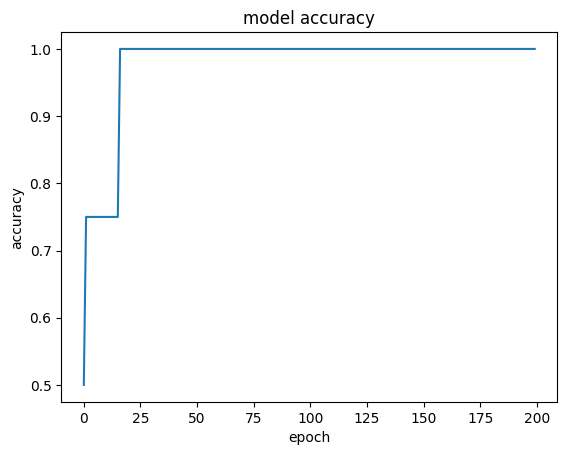

In [ ]:
# Here go the plots
import matplotlib.pyplot as plt


plt.plot(model.history.history['accuracy'])
#plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()


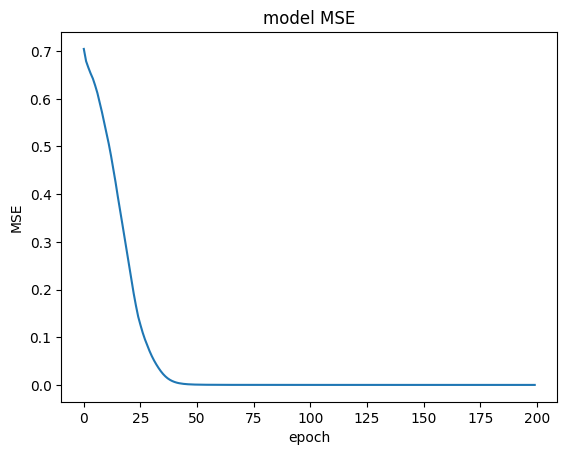

In [ ]:
# More plots

# Here go the plots
import matplotlib.pyplot as plt


plt.plot(model.history.history['loss'])
#plt.plot(model.history.history['val_accuracy'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Add as many plots as you want


We are still working with mean_squared_error as a cost-function. What would be a more suitable cost function?

Alter the cost function and see how fast you get to a stable accuracy of 1.0.


What is your best score (epoch with accuracy == 1.0)?

Can you get the score to under 100?

What might be the problem with your best model?

Answer all these questions in the text cell below

My conclusion about these experiments is: